# Limpieza de datos, preparación de la data, y análisis de estadísticas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Leemos el dataset construido en la primera parte:

In [2]:
dataset=pd.read_csv("./files/dataset_productos.csv")

In [66]:
dataset.shape

(23601, 37)

In [3]:
dataset.head(3)

,object_id,object_site_id,object_title,object_price,object_sale_price,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,...,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive
0,MCO589643727,MCO,Soplete Cohiba Encendedor Recargable Premiun ...,184900.0,NaN,COP,1,5,buy_it_now,gold_special,...,False,5_green,silver,1,140,141,historic,0.00,0.04,0.96
1,MCO608034473,MCO,Estearato De Magnesio,68000.0,NaN,COP,150,4,buy_it_now,gold_pro,...,False,5_green,platinum,225,8995,9220,historic,0.02,0.01,0.97
2,MCO535934227,MCO,Escapulario En Acero Dorado De La Virgen Del C...,28000.0,NaN,COP,1,25,buy_it_now,gold_pro,...,False,5_green,silver,69,2052,2121,historic,0.00,0.01,0.99


Hacemos un primer acercamiento a la data:

In [5]:

print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23601 entries, 0 to 23600
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   object_id                     23601 non-null  object 
 1   object_site_id                23601 non-null  object 
 2   object_title                  23601 non-null  object 
 3   object_price                  23153 non-null  float64
 4   object_sale_price             0 non-null      float64
 5   object_currency_id            23153 non-null  object 
 6   object_available_quantity     23601 non-null  int64  
 7   object_sold_quantity          23601 non-null  int64  
 8   object_buying_mode            23601 non-null  object 
 9   object_listing_type_id        23601 non-null  object 
 10  object_stop_time              23601 non-null  object 
 11  object_condition              22851 non-null  object 
 12  object_permalink              23601 non-null  object 
 13  o

De este primer vistazo de la data se evidencia que la varable orginal_price tiene 1806 registros no nulos, por lo cual puede afirmarse que de la muestra construida a la fecha se presenta un 7,6% de productos con descuento. También puede verse que la variable object_sale_price no contiene información, por lo cual se eliminará del dataset.

# Limpieza de los datos

Se eliminan las variables totalmente nulas: 

In [261]:
dataset=dataset.drop(['object_sale_price'], axis=1)

In [68]:
dataset.shape

(23601, 36)

In [8]:
dataset.head(2)

,object_id,object_site_id,object_title,object_price,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,object_stop_time,...,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive
0,MCO589643727,MCO,Soplete Cohiba Encendedor Recargable Premiun ...,184900.0,COP,1,5,buy_it_now,gold_special,2040-10-11T04:00:00.000Z,...,False,5_green,silver,1,140,141,historic,0.00,0.04,0.96
1,MCO608034473,MCO,Estearato De Magnesio,68000.0,COP,150,4,buy_it_now,gold_pro,2041-02-12T04:00:00.000Z,...,False,5_green,platinum,225,8995,9220,historic,0.02,0.01,0.97


## Ver y elimininar duplicados

veamos si la data tiene duplicados:

In [262]:
dataset.duplicated(subset=['object_id']).sum()

1297

ahora se quiere mirar si existe una columna que genera estos duplicados:

In [4]:
p = dataset.reset_index().groupby('object_id').index.nunique().reset_index()
dupli=p.loc[p['index'] > 1].sort_values('index')
dupli.head(4)

,object_id,index
2,MCO443357568,2
13260,MCO582152367,2
13221,MCO581996711,2
13217,MCO581996640,2


In [5]:
pd.options.display.max_columns = None
datadupli=dataset.merge(dupli, how='left', on='object_id')
seedupli=datadupli[datadupli['index'].notnull()]
seedupli.sort_values('object_id').head(4)


,object_id,object_site_id,object_title,object_price,object_sale_price,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,object_stop_time,object_condition,object_permalink,object_thumbnail,object_thumbnail_id,object_accepts_mercadopago,object_original_price,object_category_id,object_official_store_id,object_domain_id,object_catalog_product_id,object_use_thumbnail_id,General_category_id,General_category_name,free_ship,ship_mode,ship_logistic_type,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive,index
17990,MCO443357568,MCO,Maquina Peluqueria Corte Cabello Motilar Barbe...,44900.0,NaN,COP,1,500,buy_it_now,gold_special,2040-10-15T10:02:56.000Z,new,https://articulo.mercadolibre.com.co/MCO-44335...,http://http2.mlstatic.com/D_730000-MCO43668937...,730000-MCO43668937696_102020,True,NaN,MCO5411,NaN,MCO-HAIR_CLIPPERS,NaN,True,MCO1246,Belleza y Cuidado Personal,True,me2,cross_docking,False,5_green,platinum,418,9035,9453,historic,0.04,0.05,0.91,2.0
11431,MCO443357568,MCO,Maquina Peluqueria Corte Cabello Motilar Barbe...,44900.0,NaN,COP,1,500,buy_it_now,gold_special,2040-10-15T10:02:56.000Z,new,https://articulo.mercadolibre.com.co/MCO-44335...,http://http2.mlstatic.com/D_730000-MCO43668937...,730000-MCO43668937696_102020,True,NaN,MCO5411,NaN,MCO-HAIR_CLIPPERS,NaN,True,MCO5726,Electrodomésticos,True,me2,cross_docking,False,5_green,platinum,418,9035,9453,historic,0.04,0.05,0.91,2.0
9833,MCO445441242,MCO,Aerografo Tipo Lapicero Profesional Bd-128,89900.0,NaN,COP,1,200,buy_it_now,gold_pro,2041-03-30T13:04:21.000Z,new,https://articulo.mercadolibre.com.co/MCO-44544...,http://http2.mlstatic.com/D_668037-MCO31023669...,668037-MCO31023669853_062019,True,NaN,MCO166615,NaN,MCO-AIRBRUSHES,NaN,True,MCO175794,Herramientas,False,me2,fulfillment,False,5_green,platinum,675,26914,27589,historic,0.01,0.01,0.98,2.0
13402,MCO445441242,MCO,Aerografo Tipo Lapicero Profesional Bd-128,89900.0,NaN,COP,1,200,buy_it_now,gold_pro,2041-03-30T13:04:21.000Z,new,https://articulo.mercadolibre.com.co/MCO-44544...,http://http2.mlstatic.com/D_668037-MCO31023669...,668037-MCO31023669853_062019,True,NaN,MCO166615,NaN,MCO-AIRBRUSHES,NaN,True,MCO172890,Construcción,False,me2,fulfillment,False,5_green,platinum,675,26914,27589,historic,0.01,0.01,0.98,2.0


In [6]:
seedupli[['General_category_name','object_id']].sort_values('object_id').head(4)

,General_category_name,object_id
17990,Belleza y Cuidado Personal,MCO443357568
11431,Electrodomésticos,MCO443357568
9833,Herramientas,MCO445441242
13402,Construcción,MCO445441242


#### Nos damos cuenta que los duplicados son a causa de que un producto puede estar clasificado en dos o más categorías diferentes, teniendo en cuenta esto, se calculará una nueva variable que contenga el número de categorías en las que se puede encontrar el producto, y posteriormente se eliminarán los duplicados.

In [266]:
datadupli['#_classifications']=datadupli['index'].fillna(1)

In [267]:
dataset=dataset.merge(datadupli[['object_id','#_classifications']], how='left', on='object_id')
dataset.drop_duplicates(subset=['object_id'], keep='first', inplace=True)


In [268]:
dataset.duplicated(subset=['object_id']).sum()

0

In [269]:
dataset.shape

(22304, 37)

## Convertir nulos en una categoría de cada variable categórica

 No se considera eliminar nulos, por tanto para las variables categóricas se convertiran los nulos en una nueva categoría: "no_information" pues se considera que estos nulos vistos como una categoría podrian aportar significancia al modelo, por ejemplo, un producto sin imagen puede influir en el cliente al momento de querer adquirirlo

In [270]:
dataset.loc[dataset.object_condition.isna(),'object_condition']='no_information_condition'
dataset.loc[dataset.object_thumbnail_id.isna(),'object_thumbnail_id']='no_information_thum_id'
dataset.loc[dataset.object_official_store_id.isna(),'object_official_store_id']='no_information_store_id'
dataset.loc[dataset.object_catalog_product_id.isna(),'object_catalog_product_id']='no_information_catalog_id'
dataset.loc[dataset.ship_logistic_type.isna(),'ship_logistic_type']='no_information_logis_typ'
dataset.loc[dataset.seller_level.isna(),'seller_level']='no_information_seller_level'
dataset.loc[dataset.seller_power_status.isna(),'seller_power_status']='no_information_sell_pw_sta'
dataset.loc[dataset.object_currency_id.isna(),'object_currency_id']='no_information_currency'

## Imputar valores faltantes de la variable precio 

Se imputaran los valores faltantes del precio con la mediana del precio de cada subcategoría de productos.

In [271]:
datasetgroup=dataset.groupby('object_category_id').object_price.mean().reset_index()
datasetgroup.head()

,object_category_id,object_price
0,MCO1014,533700.000000
1,MCO1015,697200.000000
2,MCO10203,311666.666667
3,MCO10209,32939.266667
4,MCO10271,36600.000000


In [272]:

datasetv2 = dataset.merge(datasetgroup, left_index=True, on="object_category_id", how='left')
datasetv2.head(1)

,object_id,object_site_id,object_title,object_price_x,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,object_stop_time,object_condition,object_permalink,object_thumbnail,object_thumbnail_id,object_accepts_mercadopago,object_original_price,object_category_id,object_official_store_id,object_domain_id,object_catalog_product_id,object_use_thumbnail_id,General_category_id,General_category_name,free_ship,ship_mode,ship_logistic_type,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive,#_classifications,object_price_y
482,MCO589643727,MCO,Soplete Cohiba Encendedor Recargable Premiun ...,184900.0,COP,1,5,buy_it_now,gold_special,2040-10-11T04:00:00.000Z,new,https://articulo.mercadolibre.com.co/MCO-58964...,http://http2.mlstatic.com/D_893431-MCO45108181...,893431-MCO45108181219_032021,True,NaN,MCO172908,no_information_store_id,MCO-LIGHTERS,no_information_catalog_id,True,MCO1953,Otras categorías,True,not_specified,not_specified,False,5_green,silver,1,140,141,historic,0.0,0.04,0.96,1.0,26388.560976


In [273]:

datasetv2['object_price']=np.where(datasetv2.object_price_x.isnull(),
                                   datasetv2.object_price_y,
                                   datasetv2.object_price_x       
                                         )



In [274]:
datasetv2=datasetv2.drop(['object_price_x','object_price_y'], axis=1)

Aún seguirán quedando valores faltantes dado que algunas sub categorías tienen media NaN, por tanto ahora se imputan estos valores con la media de la categoría general:

In [275]:
datasetgroup2=datasetv2.groupby('General_category_id').object_price.mean().reset_index()
datasetgroup2.head()

,General_category_id,object_price
0,MCO1000,238522.146141
1,MCO1039,570255.573508
2,MCO1051,422368.026187
3,MCO1071,182770.101333
4,MCO1132,87495.922043


In [276]:
datasetv3 = datasetv2.merge(datasetgroup2, left_index=True, on="General_category_id", how='left')
datasetv3.head(1)

,object_id,object_site_id,object_title,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,object_stop_time,object_condition,object_permalink,object_thumbnail,object_thumbnail_id,object_accepts_mercadopago,object_original_price,object_category_id,object_official_store_id,object_domain_id,object_catalog_product_id,object_use_thumbnail_id,General_category_id,General_category_name,free_ship,ship_mode,ship_logistic_type,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive,#_classifications,object_price_x,object_price_y
26,MCO589643727,MCO,Soplete Cohiba Encendedor Recargable Premiun ...,COP,1,5,buy_it_now,gold_special,2040-10-11T04:00:00.000Z,new,https://articulo.mercadolibre.com.co/MCO-58964...,http://http2.mlstatic.com/D_893431-MCO45108181...,893431-MCO45108181219_032021,True,NaN,MCO172908,no_information_store_id,MCO-LIGHTERS,no_information_catalog_id,True,MCO1953,Otras categorías,True,not_specified,not_specified,False,5_green,silver,1,140,141,historic,0.0,0.04,0.96,1.0,184900.0,61973.896


In [277]:
datasetv3['object_price']=np.where(datasetv3.object_price_x.isnull(),
                                   datasetv3.object_price_y,
                                   datasetv3.object_price_x       
                                         )

In [278]:
datasetv3=datasetv3.drop(['object_price_x','object_price_y'], axis=1)

## Crear variable de % de descuento y variable de tasa aviable vs sold

Se crea una columna con el % de descuento de los productos en promoción, para esto primero se creará una variable con el valor del descuento:

In [279]:
datasetv3['object_original_price'] = datasetv3['object_original_price'].fillna(0)
datasetv3['discount_value']=(datasetv3['object_original_price'] - datasetv3['object_price']).apply(lambda x:0 if x<0 else x)

In [280]:
datasetv3['real_price']= datasetv3['object_price'] + datasetv3['discount_value']
datasetv3['pct_discount']=datasetv3['discount_value']/ datasetv3['real_price']

Ahora se cálcula una variable tasa en donde se relaciona la cantidad disponible versus lo vendido (a la fecha)

In [281]:
datasetv3['AvailableVSsold']= datasetv3['object_available_quantity']/ datasetv3['object_sold_quantity']
datasetv3['TAvailableVSsold']= np.where(np.isinf(datasetv3.AvailableVSsold),
                                   datasetv3.object_available_quantity,
                                   datasetv3.AvailableVSsold      
                                         )
datasetv3=datasetv3.drop(['AvailableVSsold'], axis=1)

In [282]:
datasetv3.sort_values('object_sold_quantity').head(2)

,object_id,object_site_id,object_title,object_currency_id,object_available_quantity,object_sold_quantity,object_buying_mode,object_listing_type_id,object_stop_time,object_condition,object_permalink,object_thumbnail,object_thumbnail_id,object_accepts_mercadopago,object_original_price,object_category_id,object_official_store_id,object_domain_id,object_catalog_product_id,object_use_thumbnail_id,General_category_id,General_category_name,free_ship,ship_mode,ship_logistic_type,ship_storepickup,seller_level,seller_power_status,sellertransactions_canceled,sellertransactions_completed,sellertransactions_total,sellertransactions_period,sellerrating_negative,sellerrating_neutral,sellerrating_positive,#_classifications,object_price,discount_value,real_price,pct_discount,TAvailableVSsold
29,MCO613944628,MCO,Threeface Uniforme Completo Verde Made In Italy,COP,1,0,buy_it_now,gold_special,2041-03-24T04:00:00.000Z,new,https://articulo.mercadolibre.com.co/MCO-61394...,http://http2.mlstatic.com/D_983617-MCO45371307...,983617-MCO45371307013_032021,True,0.0,MCO118006,no_information_store_id,MCO-CONCERT_TICKETS,no_information_catalog_id,True,MCO40433,Boletas para Espectáculos,True,me2,drop_off,False,no_information_seller_level,no_information_sell_pw_sta,0,0,0,historic,0.0,0.0,0.0,1.0,380000.0,0.0,380000.0,0.0,1.0
22,MCO622077282,MCO,Citroën C3 1.6l Vti 120 Hp Exclusive,COP,1,0,classified,gold_premium,2021-06-18T01:15:40.000Z,used,https://carro.mercadolibre.com.co/MCO-62207728...,http://http2.mlstatic.com/D_911485-MCO46144409...,911485-MCO46144409206_052021,False,0.0,MCO1744,no_information_store_id,MCO-CARS_AND_VANS,MCO17047682,True,MCO1743,"Carros, Motos y Otros",False,not_specified,no_information_logis_typ,False,no_information_seller_level,no_information_sell_pw_sta,0,0,0,historic,0.0,0.0,0.0,1.0,42900000.0,0.0,42900000.0,0.0,1.0


Esta tasa se entenderá como sigue: 
1. Mientras el valor de la tasa sea cercano a 1, significa que, a la fecha, se tiene en inventario la misma cantidad de productos que se han vendido. 
2. Si el valor de la tasa es cercano a 0, significa que, a la fecha, hay muy pocos productos disponibles y la tendencia del producto es venderse en mayor cantidad a lo que hay en inventario (podría pensarse en una alta rotación del producto llegando casi a la indisponibilidad de este). 
3. Mientas el valor de la tasa sea cada vez mayor a 1, se entenderá que en inventario hay más productos disponbles que los que se han vendido (mientras más grande sea la tasa, podría pensarse en una baja rotación del producto).  

## Variables dummies de interes

Se cálculan variables dummies que pueden ser útiles en el análisis:

In [283]:
datasetv3['thumbnail_id_binary']= datasetv3['object_thumbnail_id'].apply(lambda x: 1 if x== 'no_information' else 0)
datasetv3['official_store_id_binary']= datasetv3['object_official_store_id'].apply(lambda x: 1 if x== 'no_information' else 0)
datasetv3['catalog_product_id']= datasetv3['object_catalog_product_id'].apply(lambda x: 1 if x== 'no_information' else 0)

# Análisis de la data por categorías

Se quiere ver cual es la media y como se distribuyen los valores de las distintas variables por categoría

### Precio:

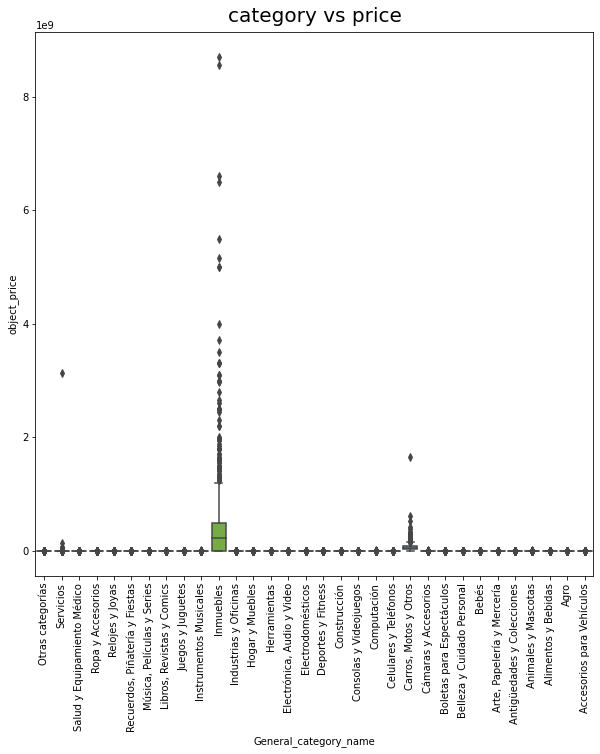

In [284]:
sns.boxplot(x='General_category_name', y = 'object_price', data = datasetv3)

plt.title("category vs price", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10,10)

Una primera conclusión es que la mediana del precio de los productos en la categoría inmuebles, dista considerablemente de las demás categorías, siendo inmuebles la categoría de mayores precios, y a esta le sigue la categoría Carros, Motos y Otros. Adicional, la categoría Servicios tiene un valor atípico. Ahora veamos de nuevo esto pero sin las categorías Inmuebles y Carros:

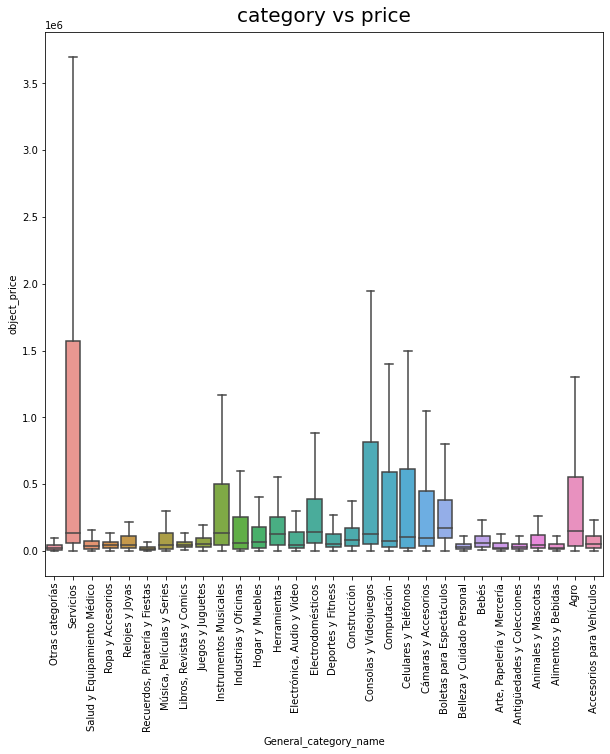

In [209]:
ax=sns.boxplot(x='General_category_name', y = 'object_price', 
            data = datasetv3[~datasetv3.General_category_name.isin(['Inmuebles','Carros, Motos y Otros'])],showfliers=False)

plt.title("category vs price", fontsize=20, verticalalignment='bottom')


plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10,10)



La categoría servicios tiene más productos con precios más altos que las demás categorías, le siguen laa categoría
Consolas y Videojuegos, Celulares y Telefonos, Computación y Agro. Por tanto un top de categorías más caras respecto a su distribución y media es: 
1. Inmuebles
2. Carros, Motos y Otros
3. Servicios
4. Consolas y Videojuegos
5. Celulares y teléfonos
6. Computación
7. Agro

In [285]:
datasetv3.groupby('General_category_name').object_price.mean().sort_values(ascending=False).head(10).reset_index()

,General_category_name,object_price
0,Inmuebles,4.737186e+08
1,"Carros, Motos y Otros",7.037546e+07
2,Servicios,6.425454e+06
3,Computación,5.807199e+05
4,Consolas y Videojuegos,5.788067e+05
5,Cámaras y Accesorios,5.702556e+05
6,Agro,5.239068e+05
7,Electrodomésticos,4.399342e+05
8,Celulares y Teléfonos,4.223680e+05
9,Instrumentos Musicales,4.067101e+05


Realizando un top 10 de promedios de precio má altos, las anteriores 7 categorías se encuentran en este top 10.

Y el top de menos costosas:

In [249]:
datasetv3.groupby('General_category_name').object_price.mean().sort_values(ascending=True).head(10).reset_index()

,General_category_name,object_price
0,"Recuerdos, Piñatería y Fiestas",23762.373333
1,Alimentos y Bebidas,43361.634771
2,"Arte, Papelería y Mercería",46155.415385
3,Belleza y Cuidado Personal,52522.158140
4,Antigüedades y Colecciones,54241.293333
5,Salud y Equipamiento Médico,55243.380000
6,Ropa y Accesorios,55771.023192
7,"Libros, Revistas y Comics",60955.224299
8,Otras categorías,61973.896000
9,Juegos y Juguetes,87495.922043


### Cantidades vendidas:

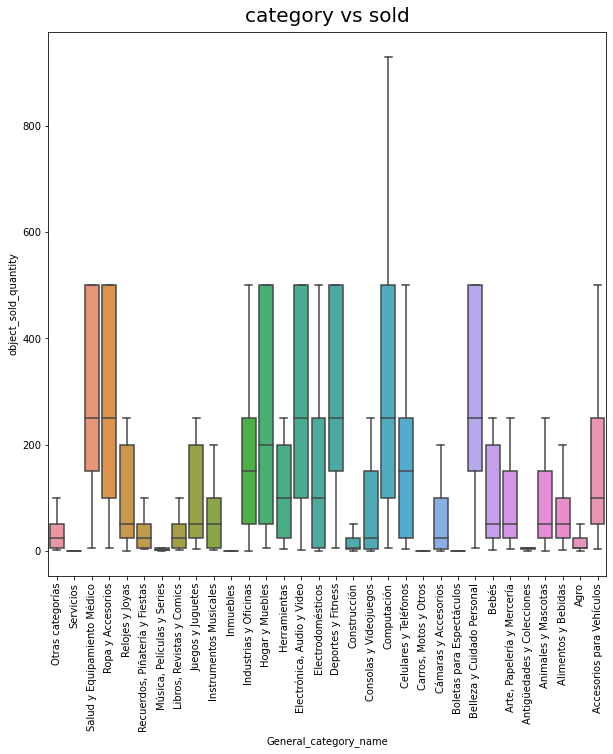

In [211]:
sns.boxplot(x='General_category_name', y = 'object_sold_quantity', data = datasetv3,showfliers=False)

plt.title("category vs sold", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10,10)

De acuerdo a la mediana y a la distribución de cada categoría, se realiza el siguiente top de productos más vendidos:
1. Salud y Equipamiento Médico
2. Belleza y Cuidado Personal
3. Deportes y Fitness 
4. Computación
5. Electrónica, Audio y Video
6. Ropa y Accesorios
7. Hogar y Muebles
8. Industrias y oficinas

Observemos el top de las categorías más vendidas,teniendo en cuenta solo promedios:

In [250]:
datasetv3.groupby('General_category_name').object_sold_quantity.mean().sort_values(ascending=False).head(10).reset_index()

,General_category_name,object_sold_quantity
0,Salud y Equipamiento Médico,411.493333
1,Belleza y Cuidado Personal,351.862016
2,Computación,327.863568
3,Deportes y Fitness,319.443522
4,"Electrónica, Audio y Video",318.886700
5,Industrias y Oficinas,294.815356
6,Hogar y Muebles,285.056090
7,Ropa y Accesorios,262.673943
8,Celulares y Teléfonos,248.785597
9,Electrodomésticos,179.690058


y las menos vendidas:

In [251]:
datasetv3.groupby('General_category_name').object_sold_quantity.mean().sort_values(ascending=True).head(10).reset_index()

,General_category_name,object_sold_quantity
0,Servicios,0.000000
1,"Carros, Motos y Otros",0.000000
2,Inmuebles,0.000000
3,Boletas para Espectáculos,1.788360
4,"Música, Películas y Series",13.905333
5,Antigüedades y Colecciones,21.256000
6,Construcción,26.260989
7,Agro,28.624813
8,"Libros, Revistas y Comics",39.700935
9,Otras categorías,51.202667


### Tasa aviableVSsold:

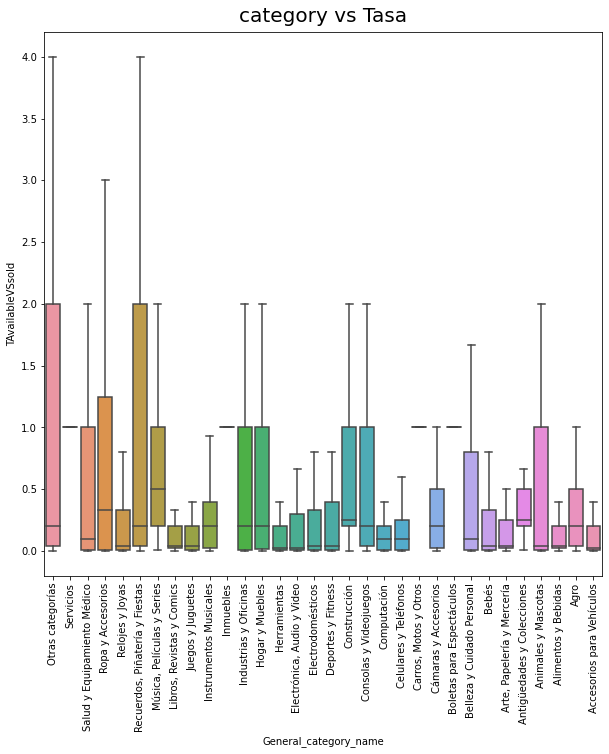

In [213]:
sns.boxplot(x='General_category_name', y = 'TAvailableVSsold', data = datasetv3,showfliers=False)

plt.title("category vs Tasa", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10,10)

Top menor rotación de productos:

In [252]:
datasetv3.groupby('General_category_name').TAvailableVSsold.mean().sort_values(ascending=False).head(10).reset_index()

,General_category_name,TAvailableVSsold
0,"Música, Películas y Series",24.223760
1,"Recuerdos, Piñatería y Fiestas",22.607171
2,Antigüedades y Colecciones,21.606406
3,Instrumentos Musicales,21.322174
4,"Libros, Revistas y Comics",16.559915
5,Otras categorías,13.066687
6,Agro,10.842062
7,Hogar y Muebles,7.334849
8,Construcción,6.598367
9,Cámaras y Accesorios,5.851184


Top mayor rotación de productos:

In [286]:
datasetv3.groupby('General_category_name').TAvailableVSsold.mean().sort_values(ascending=True).head(10).reset_index()

,General_category_name,TAvailableVSsold
0,Computación,0.537161
1,Celulares y Teléfonos,0.765403
2,Relojes y Joyas,0.844860
3,"Electrónica, Audio y Video",0.995835
4,Servicios,1.000000
5,Inmuebles,1.000000
6,"Carros, Motos y Otros",1.000000
7,Deportes y Fitness,1.179133
8,Belleza y Cuidado Personal,1.210392
9,Electrodomésticos,1.604208


Combinando esta parte con el top de productos más y menos vendidos se puede decir que:

Habíamos notado que las categorías Computación, Celulares y Telefonos y Electrónica, Audio y Video hacen parte del top 10 de categorías más vendidas, y ahora vemos, que a su vez, son las categorías con mejor rotación de productos, es decir que, la cantidad de productos en inventario no supera a la cantidad de productos vendidos, pensandose así que hay una buena relación entre lo que entra y sale.

Mientras que las categorías Música, películas y series,y Antiguedad y colecciones, hacen parte de las categorías menos vendidas y a su vez la cantidad de productos en inventario supera la cantidad de vendidos, por lo que puede pensarse que las bajas ventas no estan relacionadas con una indisponibilidad del producto, sino que más bien el producto es de baja rotación.

## Participación de productos en promoción por cada categoría

Ahora se estudiará el porcentaje de productos en promoción de cada categoría y se relacionará con lo anteriormente concluido.

In [287]:
datasetv3['is_promo']=datasetv3['object_original_price'].apply(lambda x:1 if x>0 else 0)
prod_cat=datasetv3.groupby('General_category_name').object_id.count().reset_index()

In [288]:
prom_cat=datasetv3.groupby('General_category_name').is_promo.sum().reset_index()


In [289]:
prod_prom=prod_cat.merge(prom_cat, how='left',on='General_category_name')
prod_prom.head(2)

,General_category_name,object_id,is_promo
0,Accesorios para Vehículos,733,77
1,Agro,669,47


In [290]:
prod_prom['pct_products_discount']=prod_prom['is_promo']/ prod_prom['object_id']
prod_prom.sort_values('pct_products_discount',ascending=False)

,General_category_name,object_id,is_promo,pct_products_discount
23,Juegos y Juguetes,744,176,0.236559
10,Celulares y Teléfonos,611,137,0.224223
16,Electrodomésticos,684,142,0.207602
19,Hogar y Muebles,624,92,0.147436
17,"Electrónica, Audio y Video",609,89,0.146141
15,Deportes y Fitness,602,87,0.144518
29,Ropa y Accesorios,733,89,0.121419
18,Herramientas,738,88,0.119241
11,Computación,667,75,0.112444
0,Accesorios para Vehículos,733,77,0.105048


#### Ahora veamos el porcentaje promedio y la distribución del porcentaje de descuento en cada categoría (filtrando solo los productos en promoción).

In [291]:
datasetwd= datasetv3[datasetv3['discount_value']>0]

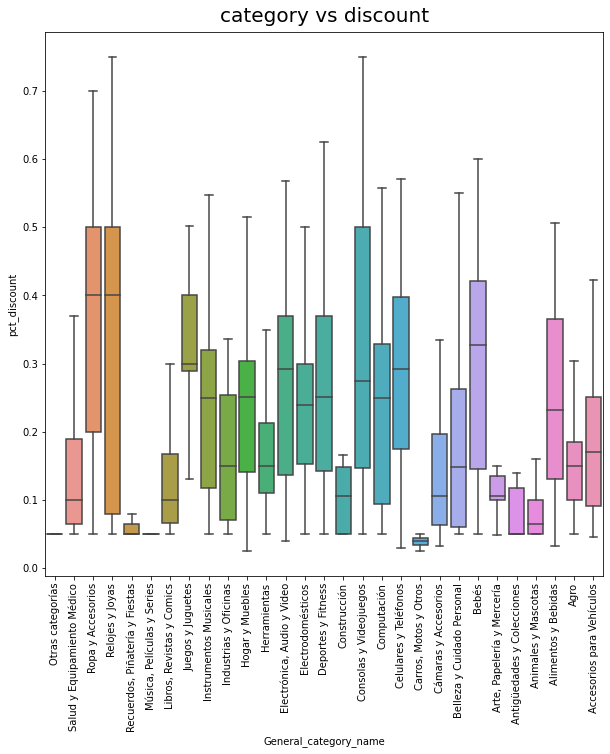

In [292]:
sns.boxplot(x='General_category_name', y = 'pct_discount', data = datasetwd,showfliers=False)

plt.title("category vs discount", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10,10)

Teniendo en cuenta la mediana y la distribución del pct de descuento, se realiza el siguiente top de categorías con mayor decuento en sus productos:

1. Ropa y accesorios
2. Relojes y Joyas
3. Bebés
4. Juegos y Juguetes
5. Celulares y Teléfonos
6. Consolas y videojuegos
7. Electronica, Audio y video
8. Deportes y Fitness
9. Alimentos y Bebidas
10. Instrumentos musicales

Teniendo en cuenta el promedio, el top de las categorías con más y menos descuentos respectivamente:

In [293]:
datasetwd.groupby('General_category_name').pct_discount.mean().sort_values(ascending=False).head(10).reset_index()

,General_category_name,pct_discount
0,Ropa y Accesorios,0.363515
1,Relojes y Joyas,0.339476
2,Juegos y Juguetes,0.312283
3,Consolas y Videojuegos,0.293584
4,Bebés,0.287453
5,Celulares y Teléfonos,0.283356
6,"Electrónica, Audio y Video",0.274325
7,Deportes y Fitness,0.268190
8,Alimentos y Bebidas,0.252122
9,Instrumentos Musicales,0.247032


In [294]:
datasetwd.groupby('General_category_name').pct_discount.mean().sort_values(ascending=True).head(10).reset_index()

,General_category_name,pct_discount
0,"Carros, Motos y Otros",0.038790
1,"Música, Películas y Series",0.053333
2,Otras categorías,0.054545
3,"Recuerdos, Piñatería y Fiestas",0.061810
4,Antigüedades y Colecciones,0.101828
5,Construcción,0.103350
6,"Arte, Papelería y Mercería",0.124193
7,Animales y Mascotas,0.131334
8,"Libros, Revistas y Comics",0.134663
9,Agro,0.150975


# Conclusiones

1. Servicios es una de las categorías más costosas, menos vendidas y con menor participación de productos en promoción. Lo mismo sucede para la categoría inmuebles. ¿Podría pensarse que un impulso para estas categorías puede ser el ofrecimiento de más promociones? 

2. Computación es una de las categorías más costosas, más vendidas, con mejor rotación, y clasifica dentro del top 10 de categorías con más productos en promoción. 

3. Celularesy Teléfonos es una de las categorías con mejor rotación, entra en el top 10 de más costosas y de más vendidas, y esta entre las 10 que más productos en promoción tiene, adicional, el porcentaje de descuento ofrecido en sus productos esta entre los más altos. ¿Habrá relación entre las varables ventas y promoción?. 

4. Las categorías belleza y salud equipamiento médico se encuentran entre las más vendidas y menos costosas. Esta categoría tampoco pertenece a las categorías con mayor participación de productos en promoción. ¿Es posible pensar que las ventas de un producto dependen de la interacción entre la variable precio y la variable promoción?

5. Juegos y Juguetes, esta en el top de categorías con más productos en promoción y con mejores descuentos, adicional son categorías menos costosas, sin embargo no pertenece al top de categorías más vendidas. Entonces, no necesariamente el precio y los descuentos influyen en las ventas, hace falta una variable relacionada con la naturaleza de la categoría, quizas podría ser una variable de temporalidad. 

Se guarda la base datasetv3 para utilizarla en la tercera parte (modelación)

In [295]:
ruta = "./files/dataset_modelar.csv"
datasetv3.to_csv(ruta,index=False)